In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.tools

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [2]:
life_expectancy = pd.read_csv("Life-Expectancy-Data-Updated.csv")


In [55]:
life_expectancy.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [56]:
life_expectancy.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [57]:
life_expectancy.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [58]:
life_expectancy.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [3]:
life_expectancy = life_expectancy.dropna()
life_expectancy

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


In [60]:
cut = life_expectancy.status.unique()
print(cut)

AttributeError: 'DataFrame' object has no attribute 'status'

/var/folders/f_/t9kyfhf975s9q0jlqgf0yzp00000gn/T/ipykernel_73172/4234650945.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(life_expectancy.corr(), annot = True)


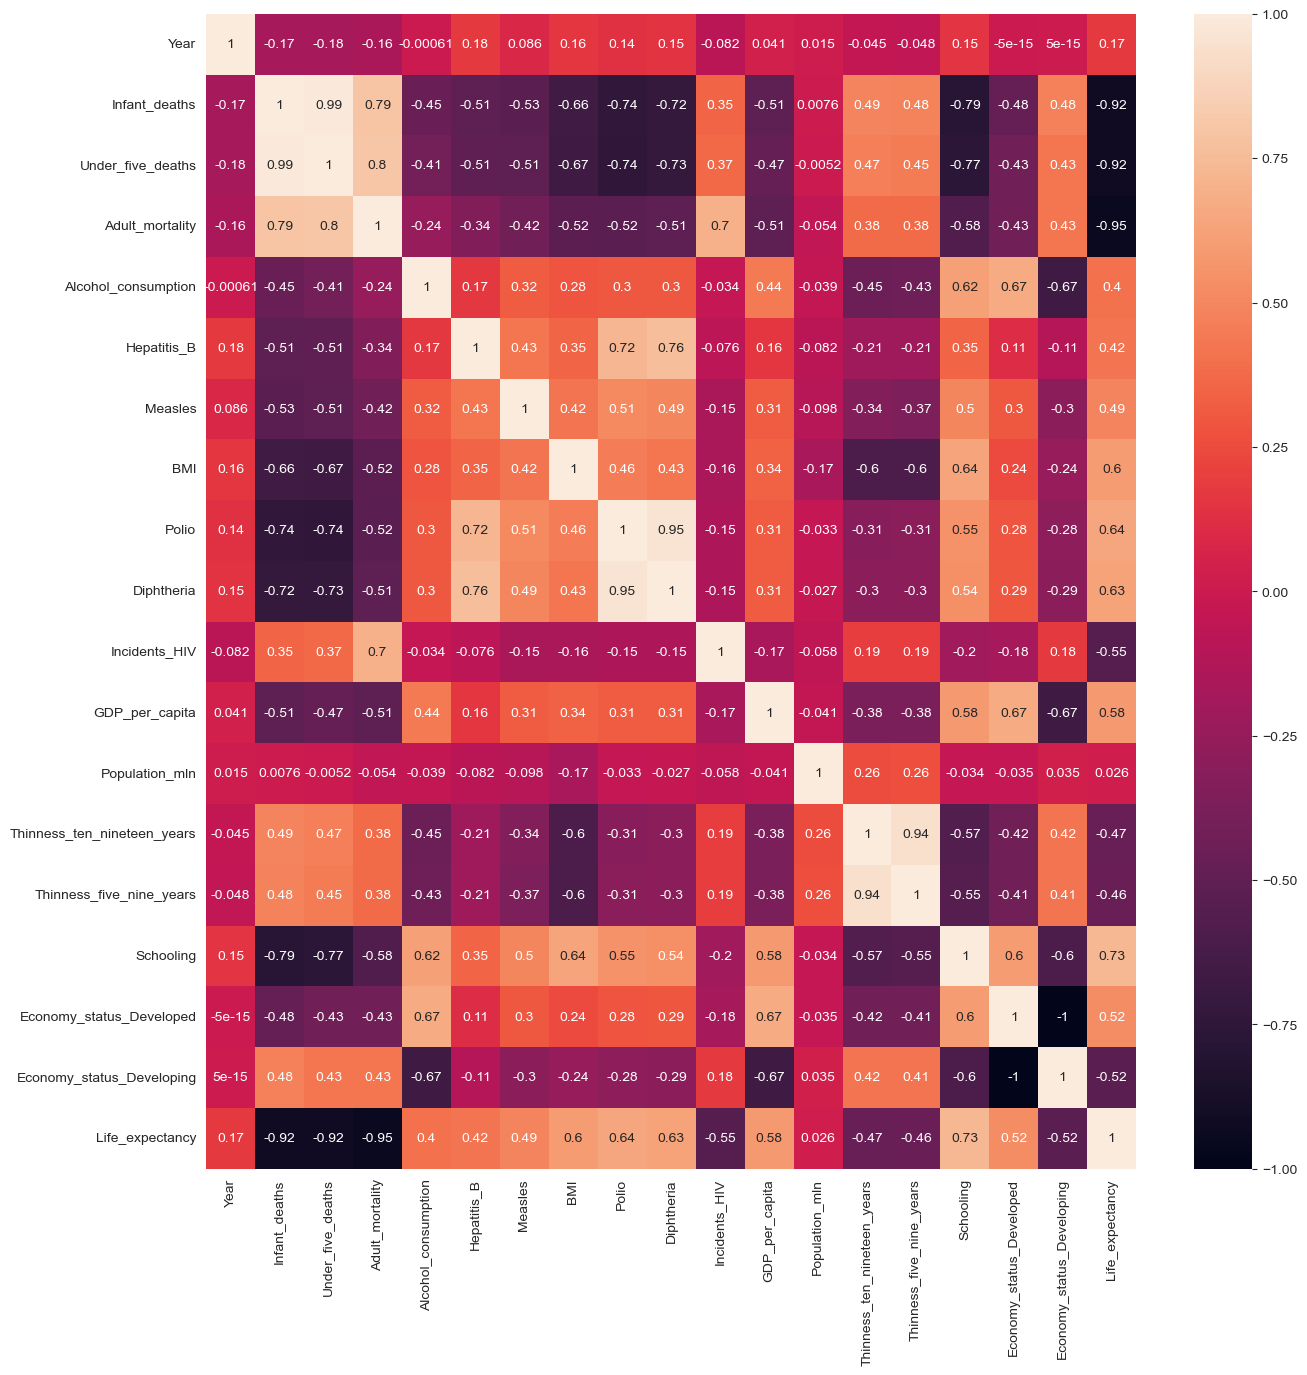

In [61]:
plt.figure(figsize = (15, 15))
sns.heatmap(life_expectancy.corr(), annot = True)

plt.show()

In [4]:
life_expectancy.rename(columns=lambda x: x.strip().lower().replace("  ", " "), inplace=True)
print(life_expectancy.columns)

Index(['country', 'region', 'year', 'infant_deaths', 'under_five_deaths',
       'adult_mortality', 'alcohol_consumption', 'hepatitis_b', 'measles',
       'bmi', 'polio', 'diphtheria', 'incidents_hiv', 'gdp_per_capita',
       'population_mln', 'thinness_ten_nineteen_years',
       'thinness_five_nine_years', 'schooling', 'economy_status_developed',
       'economy_status_developing', 'life_expectancy'],
      dtype='object')


In [ ]:
sns.pairplot(life_expectancy[['population_mln']], height = 6)
plt.show()

In [63]:
life_expectancy_scale = life_expectancy[['population']].copy()

KeyError: "None of [Index(['population'], dtype='object')] are in the [columns]"

In [5]:
feature_cols = list(life_expectancy.columns)
feature_cols.remove('life_expectancy')

In [6]:
X = life_expectancy[feature_cols]
y = life_expectancy['life_expectancy']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
X_train.head()[['adult_mortality', 'alcohol_consumption','bmi',
'gdp_per_capita', 'schooling']]

,adult_mortality,alcohol_consumption,bmi,gdp_per_capita,schooling
2026,111.2825,2.45,22.9,3694,10.9
651,114.2985,13.42,26.6,14070,11.6
2225,143.0785,6.60,26.6,16056,10.0
2357,80.9365,4.88,26.1,3577,9.3
670,495.7265,2.29,23.2,3298,5.8


In [8]:
def feature_eng(life_expectancy):
    life_expectancy = life_expectancy.copy()

    columns_to_scale = life_expectancy.columns.drop(["year", "country", "region", "economy_status_developed",
                                                                    "economy_status_developing"])
    rob = RobustScaler()
    rob.fit(life_expectancy[columns_to_scale])
    life_expectancy[columns_to_scale] = rob.transform(life_expectancy[columns_to_scale])

    df = sm.add_constant(life_expectancy)
    return df

In [9]:
X_train_fe = feature_eng(X_train)

In [ ]:
X_train_fe.head()

In [10]:
feature_cols = ['const', 'under_five_deaths',
                'adult_mortality', 'alcohol_consumption', 'hepatitis_b',
                'bmi', 'incidents_hiv', 'gdp_per_capita', 'thinness_five_nine_years', 'schooling']


lin_reg = sm.OLS(y_train, X_train_fe[feature_cols])
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.153e+04
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:58:05   Log-Likelihood:                -4004.3
No. Observations:                2291   AIC:                             8029.
Df Residuals:                    2281   BIC:                             8086.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       71.4255      0.042   1703.232      0.000      71.343      71.508
under_five_deaths           -4.6668      0.096    -48.704      0.000      -4.855      -4.479
adult_mortality             -7.0678      0.099    -71.252      0.000      -7.262      -6.873
alcohol_consumption          0.7135      0.065     10.920      0.000       0.585       0.842
hepatitis_b                 -0.0898      0.039     -2.328      0.020      -0.165      -0.014
bmi                         -0.5013      0.068     -7.412      0.000      -0.634      -0.369
incidents_hiv                0.0482      0.008      5.842      0.000       0.032       0.064
gdp_per_capita               0.3837      0.027     14.050      0.000       0.330       0.437
thinness_five_nine_years    -0.2516      0.052     -4.855      0.000      -0.353      -0.150
schooling                    0.6206      0.099      6.245      0.000       0.426       0.815
==============================================================================
Omnibus:                       34.666   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.615
Skew:                           0.155   Prob(JB):                     6.19e-12
Kurtosis:                       3.667   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
y_pred = results.predict(X_train_fe[feature_cols])

rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)

print(rmse)

1.389442579341248


In [12]:
X_test_fe = feature_eng(X_test)
X_test_fe = X_test_fe[feature_cols]

In [13]:
y_test_pred = results.predict(X_test_fe)
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print(rmse)

1.5974356938469727


In [14]:
X_train_fe_cols = X_train_fe[feature_cols]
X_train_fe_cols['y_pred'] = y_pred

/var/folders/f_/t9kyfhf975s9q0jlqgf0yzp00000gn/T/ipykernel_82588/867806180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fe_cols['y_pred'] = y_pred


In [ ]:
X_train_fe_cols.head()

In [75]:
def calc_life_exp(adult_mortality, alcohol_consumption,bmi,
                  gdp_per_capita, schooling):
    # Return meal * first_lin.coef_[0] - first_lin.intercept_

    return ((schooling) * (3.161184)) + ((gdp_per_capita) * (0.172408)) + ((bmi) * (0.502559)) + ((alcohol_consumption) * (0.990181)) + ((adult_mortality) * -9.104902) + (70.629900)

life_exp = calc_life_exp()
print

TypeError: calc_life_exp() missing 5 required positional arguments: 'adult_mortality', 'alcohol_consumption', 'bmi', 'gdp_per_capita', and 'schooling'

In [ ]:
X_train_fe.columns

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # a module to evaluate the (VIF)

cols = ['under_five_deaths',
        'adult_mortality', 'alcohol_consumption', 'hepatitis_b',
        'bmi', 'incidents_hiv', 'gdp_per_capita', 'thinness_five_nine_years', 'schooling']

## We can create an indexed list (a series) where we list the VIF of each of the columns. Note the use of '.shape' in the second part of the loop
pd.Series([variance_inflation_factor(X_train_fe[cols].values, i) for i in range(X_train_fe[cols].shape[1])], index = X_train_fe[cols].columns)

In [15]:
feature_cols_sensitive = ['const',
                          'adult_mortality', 'alcohol_consumption',
                          'bmi', 'gdp_per_capita', 'schooling']

lin_reg_sensitive = sm.OLS(y_train, X_train_fe[feature_cols_sensitive])
results_sensitive = lin_reg_sensitive.fit()
results_sensitive.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     8489.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:58:23   Log-Likelihood:                -4995.5
No. Observations:                2291   AIC:                         1.000e+04
Df Residuals:                    2285   BIC:                         1.004e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  70.6299      0.056   1259.510      0.000      70.520      70.740
adult_mortality        -9.1049      0.075   -121.661      0.000      -9.252      -8.958
alcohol_consumption     0.9902      0.098     10.127      0.000       0.798       1.182
bmi                     0.5026      0.089      5.630      0.000       0.328       0.678
gdp_per_capita          0.1724      0.039      4.382      0.000       0.095       0.250
schooling               3.1612      0.135     23.420      0.000       2.896       3.426
==============================================================================
Omnibus:                       89.562   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.710
Skew:                          -0.284   Prob(JB):                     5.17e-38
Kurtosis:                       4.215   Cond. No.                         6.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
y_pred_sensitive = results_sensitive.predict(X_train_fe[feature_cols_sensitive])

rmse_sensitive = statsmodels.tools.eval_measures.rmse(y_train, y_pred_sensitive)

print(rmse_sensitive)

2.1416039897757546


In [17]:
X_test_fe = feature_eng(X_test)
X_test_fe = X_test_fe[feature_cols_sensitive]

In [18]:
y_test_pred_sensitive = results_sensitive.predict(X_test_fe)
rmse_sensitive = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred_sensitive)
print(rmse_sensitive)

2.3121821686611423


In [ ]:
results_sensitive.params[0]

In [ ]:
results_sensitive.params[1]

In [19]:
feature_cols = ['const', 'under_five_deaths',
                'adult_mortality', 'alcohol_consumption', 'hepatitis_b',
                'bmi', 'incidents_hiv', 'gdp_per_capita', 'thinness_five_nine_years', 'schooling']
feature_cols_sensitive = ['const', 'adult_mortality', 'alcohol_consumption','bmi',
                          'gdp_per_capita', 'schooling']

f_cols_no_const = ['adult_mortality', 'alcohol_consumption','bmi',
                   'gdp_per_capita', 'schooling']

user_choice = input("Would you Like to use sensitive data in the model? Please answer Yes or No")

if user_choice == 'Yes':
    X_train_fe_modified = X_train_fe[feature_cols]
    lin_reg = sm.OLS(y_train, X_train_fe_modified)
    y_pred = results.predict(X_train_fe[feature_cols])
    rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)
    print("Root Mean Squared Error (RMSE) for train:",rmse)

    X_test_fe = feature_eng(X_test)
    X_test_fe = X_test_fe[feature_cols]
    y_test_pred = results.predict(X_test_fe)
    rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
    print("Root Mean Squared Error (RMSE) for test:",rmse)

    coefficients = results.params
    print("Coefficients:")
    print(coefficients)

    under_five_deaths = input("What is your statistic for Under five deaths?")
    under_five = float(under_five_deaths)
    adult_mort = input("What is your statistic for Adult Mortality?")
    ad_mort = float(adult_mort)
    alco_con = input("What is your statistic for Alcohol Consumption?")
    alco_c = float(alco_con)
    hepatitis = input("What is your statistic for Hepatitis?")
    Hep_b = float(hepatitis)
    bmi = input("What is your statistic for BMI?")
    bmi_n = float(bmi)
    inc_HIV = input("What is your statistic for incidents of HIV?")
    HIV = float(inc_HIV)
    gdp = input("What is your statistic for GDP Per Capita?")
    gdp_n = float(gdp)
    thinness_five_nine = input("What is your statistic for thinness between ages 5 - 9?")
    thinness = float(thinness_five_nine)
    school_n = input("What is your statistic for Schooling?")
    schooling = float(school_n)

    def calc_life_exp_1(under_five, ad_mort, alco_c, Hep_b, bmi_n, HIV,
                        gdp_n, thinness, schooling):

        return ((schooling) * (results.params[9])) + ((thinness) * (results.params[8])) + ((gdp_n) * (results.params[7])) + ((HIV) * (results.params[6])) + ((bmi_n) * (results.params[5])) + ((Hep_b) * (results.params[4])) + ((alco_c) * (results.params[3])) + ((ad_mort) * (results.params[2])) + ((under_five) * (results.params[1])) + (results.params[0])

    life_exp_final = calc_life_exp_1(under_five, ad_mort, alco_c, Hep_b, bmi_n, HIV,
                                     gdp_n, thinness, schooling)
    print("Your predicted life expectancy with this model is:", life_exp_final.round(2))

else:
    X_train_fe_modified = X_train_fe[feature_cols_sensitive]
    lin_reg = sm.OLS(y_train, X_train_fe_modified)
    y_pred_sensitive = results_sensitive.predict(X_train_fe[feature_cols_sensitive])
    rmse_sensitive = statsmodels.tools.eval_measures.rmse(y_train, y_pred_sensitive)
    print("Root Mean Squared Error (RMSE) for train:",rmse_sensitive)

    X_test_fe = feature_eng(X_test)
    X_test_fe = X_test_fe[feature_cols_sensitive]
    y_test_pred_sensitive = results_sensitive.predict(X_test_fe)
    rmse_sensitive = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred_sensitive)
    print("Root Mean Squared Error (RMSE) for test:",rmse_sensitive)

    coefficients = results_sensitive.params
    print("Coefficients:")
    print(coefficients)

    adult_mort_sens = input("What is your statistic for Adult Mortality?")
    ad_mort_s = float(adult_mort_sens)

    alco_con_sens = input("What is your statistic for Alcohol Consumption?")
    alco_s = float(alco_con_sens)

    bmi_sens = input("What is your statistic for BMI?")
    bmi_s = float(bmi_sens)

    gdp_sens = input("What is your statistic for GDP Per Capita?")
    gdp_s = float(gdp_sens)

    school_sens = input("What is your statistic for Schooling?")
    schooling_s = float(school_sens)

    calc_life_exp_sens = pd.DataFrame(data = [[ad_mort_s, alco_s, bmi_s, gdp_s, schooling_s]], columns = ['adult_mortality', 'alcohol_consumption','bmi', 'gdp_per_capita', 'schooling'])

    rob = RobustScaler()
    transformer = rob.fit(X_train[f_cols_no_const])
    calc_life_exp_sens = transformer.transform(calc_life_exp_sens)
    pd.DataFrame(calc_life_exp_sens, columns = ['adult_mortality', 'alcohol_consumption','bmi', 'gdp_per_capita', 'schooling'])

    def calc_life_exp(ad_mort_s, alco_s, bmi_s,
                      gdp_s, schooling_s):

        return ((schooling_s) * (results_sensitive.params[5])) + ((gdp_s) * (results_sensitive.params[4])) + ((bmi_s) * (results_sensitive.params[3])) + ((alco_s) * (results_sensitive.params[2])) + ((ad_mort_s) * (results_sensitive.params[1])) + (results_sensitive.params[0])


    life_exp_fin = calc_life_exp(ad_mort_s, alco_s, bmi_s,
                             gdp_s, schooling_s)
    print("Your predicted life expectancy with this model is:", life_exp_fin.round(2))

results = lin_reg.fit()
results.summary()

Root Mean Squared Error (RMSE) for train: 2.1416039897757546
Root Mean Squared Error (RMSE) for test: 2.3121821686611423
Coefficients:
const                  70.629900
adult_mortality        -9.104902
alcohol_consumption     0.990181
bmi                     0.502559
gdp_per_capita          0.172408
schooling               3.161184
dtype: float64
Your predicted life expectancy with this model is: -1179.05


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     8489.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:00:22   Log-Likelihood:                -4995.5
No. Observations:                2291   AIC:                         1.000e+04
Df Residuals:                    2285   BIC:                         1.004e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  70.6299      0.056   1259.510      0.000      70.520      70.740
adult_mortality        -9.1049      0.075   -121.661      0.000      -9.252      -8.958
alcohol_consumption     0.9902      0.098     10.127      0.000       0.798       1.182
bmi                     0.5026      0.089      5.630      0.000       0.328       0.678
gdp_per_capita          0.1724      0.039      4.382      0.000       0.095       0.250
schooling               3.1612      0.135     23.420      0.000       2.896       3.426
==============================================================================
Omnibus:                       89.562   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.710
Skew:                          -0.284   Prob(JB):                     5.17e-38
Kurtosis:                       4.215   Cond. No.                         6.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
-.0348360, 1.428354, 0.34375, 0.855270, 0.698113

In [ ]:
calc_life_exp_sens = pd.DataFrame(data = [[ad_mort_s, alco_s, bmi_s, gdp_s, schooling_s]], columns = ['adult_mortality', 'alcohol_consumption','bmi',
                                                                                                      'gdp_per_capita', 'schooling'])
calc_life_exp_sens.head()

In [ ]:
X_train_fe_cols_sens = X_train_fe[feature_cols_sensitive]
X_train_fe_cols_sens['y_pred'] = y_pred_sensitive

In [ ]:
X_train_fe_cols_sens.head()

In [ ]:
def calc_life_exp(adult_mortality, alcohol_consumption,bmi,
                  gdp_per_capita, schooling):
    # Return meal * first_lin.coef_[0] - first_lin.intercept_

    return ((schooling) * (3.161184)) + ((gdp_per_capita) * (0.172408)) + ((bmi) * (0.502559)) + ((alcohol_consumption) * (0.990181)) + ((adult_mortality) * -9.104902) + (70.629900)

life_exp = calc_life_exp(-0.371432, -0.3125, 1.40625, -0.105834, 0.396226)
print(life_exp)

In [ ]:
df = pd.DataFrame([(111, 2, 30, 3000, 10)], columns = ['adult_mortality', 'alcohol_consumption','bmi', 'gdp_per_capita', 'schooling'])

def calc_life_exp(ad_mort_s, alco_s, bmi_s,
                  gdp_s, schooling_s):


    return ((schooling_s) * (results_sensitive.params[5])) + ((gdp_s) * (results_sensitive.params[4])) + ((bmi_s) * (results_sensitive.params[3])) + ((alco_s) * (results_sensitive.params[2])) + ((ad_mort_s) * (results_sensitive.params[1])) + (results_sensitive.params[0])

rob = RobustScaler()
rob.fit(X_train[f_cols_no_const])
dataframe_final = rob.transform(df)
pd.DataFrame(dataframe_final, columns = ['adult_mortality', 'alcohol_consumption','bmi', 'gdp_per_capita', 'schooling'])

In [ ]:
life_exp_fin = calc_life_exp(ad_mort_s, alco_s, bmi_s,
                             gdp_s, schooling_s)
print("Your predicted life expectancy with this model is:", life_exp_fin.round(2))